# Import libraries

### Pandas
### Numpy
### Seaborn
## Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt

### Read the CSV File 

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Regression_Models\Adda Boost Regression\supersales_dataset.csv")

### Explore the Data

In [3]:
df.head()

,CustomerID,Quantity,Discount,ProfitMargin,UnitPrice,Sales
0,1,7,0.14,0.11,215,1478.77
1,2,4,0.30,0.17,458,1459.94
2,3,8,0.00,0.23,63,579.81
3,4,5,0.06,0.18,252,1378.82
4,5,7,0.12,0.06,337,2172.26


### Check the total Number of Rows and columns

In [4]:
df.shape

(1200, 6)

### Remove Irrelevant Columns

In [5]:
df = df.drop(columns=["CustomerID"])

### Check it the column remove successfully or not ( Successfully removed it)

In [6]:
df.head()

,Quantity,Discount,ProfitMargin,UnitPrice,Sales
0,7,0.14,0.11,215,1478.77
1,4,0.30,0.17,458,1459.94
2,8,0.00,0.23,63,579.81
3,5,0.06,0.18,252,1378.82
4,7,0.12,0.06,337,2172.26


### Check the Null Values

In [7]:
df.isnull().sum()

Quantity        0
Discount        0
ProfitMargin    0
UnitPrice       0
Sales           0
dtype: int64

### Check Inofrmation about the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Quantity      1200 non-null   int64  
 1   Discount      1200 non-null   float64
 2   ProfitMargin  1200 non-null   float64
 3   UnitPrice     1200 non-null   int64  
 4   Sales         1200 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 47.0 KB


### Check the Stastistical Summary of the data

In [9]:
df.describe()

,Quantity,Discount,ProfitMargin,UnitPrice,Sales
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,4.915000,0.148258,0.178525,285.165000,1412.612675
std,2.600014,0.086966,0.071510,129.026726,1053.403725
min,1.000000,0.000000,0.050000,50.000000,-36.680000
25%,3.000000,0.070000,0.120000,177.000000,527.792500
50%,5.000000,0.150000,0.180000,286.500000,1191.010000
75%,7.000000,0.220000,0.240000,398.250000,2065.642500
max,9.000000,0.300000,0.300000,499.000000,5019.250000


### Check the outlier in data with the boxplot

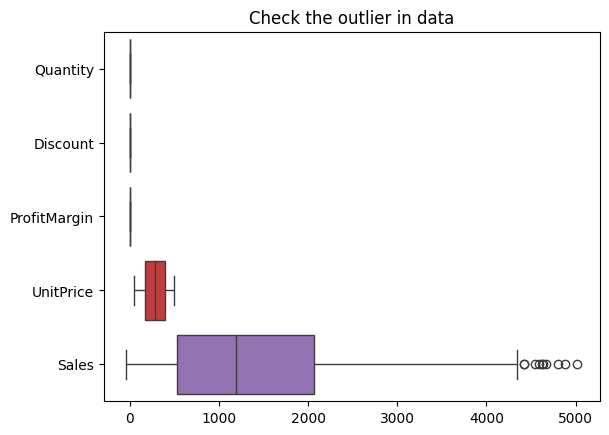

In [10]:
sns.boxplot(data=df,orient='h')
plt.title("Check the outlier in data")
plt.show()

### Check the relationship between the columns through pairplot 

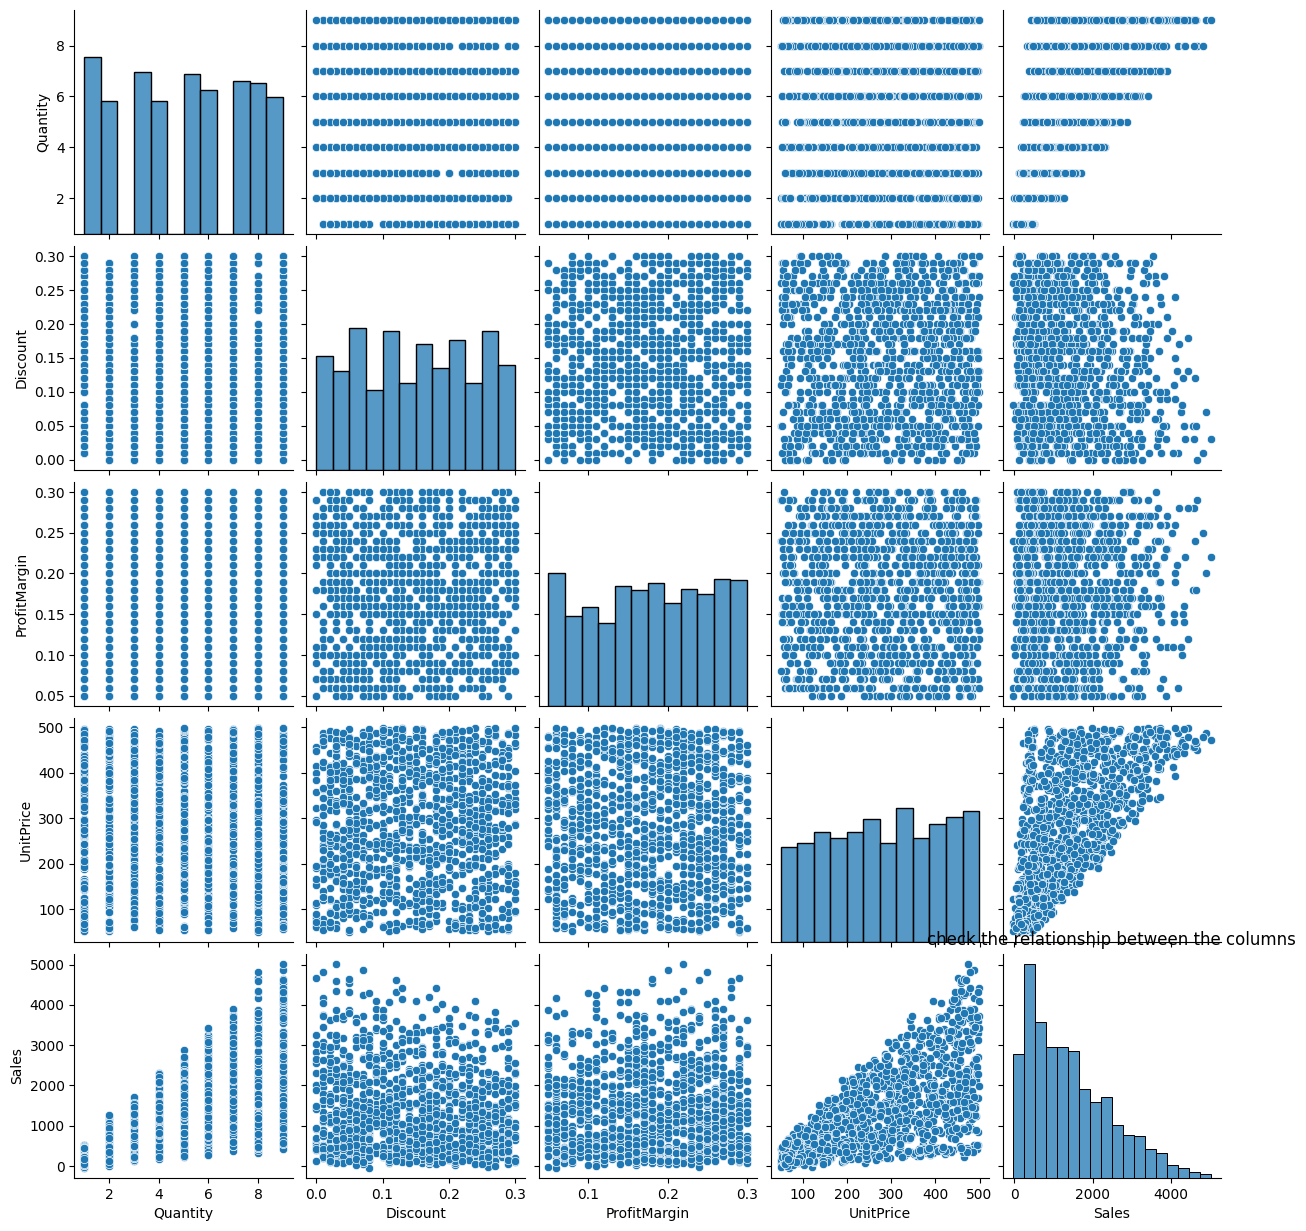

In [11]:
sns.pairplot(data=df)
plt.title("check the relationship between the columns")
plt.show()

### Check the co-relationship between the column through heatmap

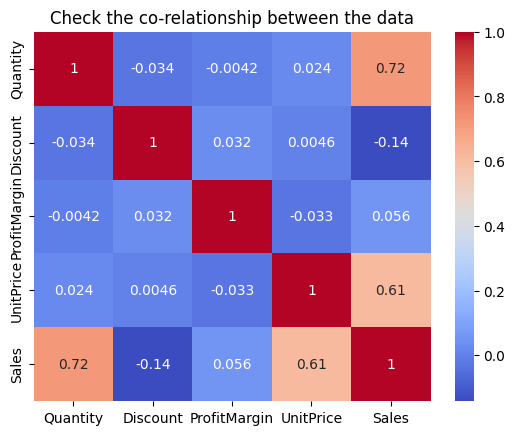

In [12]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Check the co-relationship between the data")
plt.show()

### Split the data in x and y (Dependent & Independent Variable)

In [13]:
x = df.iloc[:,:-1]
y = df[["Sales"]]

### Import Train Test Split From sklearn module model_selection for spliting the data in Training and Testing 

In [14]:
from sklearn.model_selection import train_test_split

### Split the data in traning and testing 

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=19)

### Import Machine Learning Model AdaBoostRegressor from sklearn module Ensemble

In [16]:
from sklearn.ensemble import AdaBoostRegressor

### Apply/Fit the model

In [17]:
adr = AdaBoostRegressor()
adr.fit(x_train,y_train)

C:\Users\zabiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,estimator,None
,n_estimators,50
,learning_rate,1.0
,loss,'linear'
,random_state,None


### Check the score (accurray) of the model for check the scanerio of the **overfitting** (But Our Model is not **overrfit**)

In [18]:
adr.score(x_test,y_test)*100,adr.score(x_train,y_train)*100

(95.28854198521955, 94.87267305960391)

### Predict the value

In [19]:
df["Prediction"] = adr.predict(x)
df.head()

,Quantity,Discount,ProfitMargin,UnitPrice,Sales,Prediction
0,7,0.14,0.11,215,1478.77,1774.727797
1,4,0.30,0.17,458,1459.94,1787.344444
2,8,0.00,0.23,63,579.81,840.229091
3,5,0.06,0.18,252,1378.82,1375.468182
4,7,0.12,0.06,337,2172.26,2545.976020


### Import Metrics from sklearn to check overall performace of the model¶

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Check the Performance

In [21]:
y_pred = adr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"📉 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 R² Score: {r2 * 100:.2f}")


📉 MAE: 199.87
📉 MSE: 58515.54
📉 RMSE: 241.90
🎯 R² Score: 95.29


### Check the Performance of the model through Data Visualization 

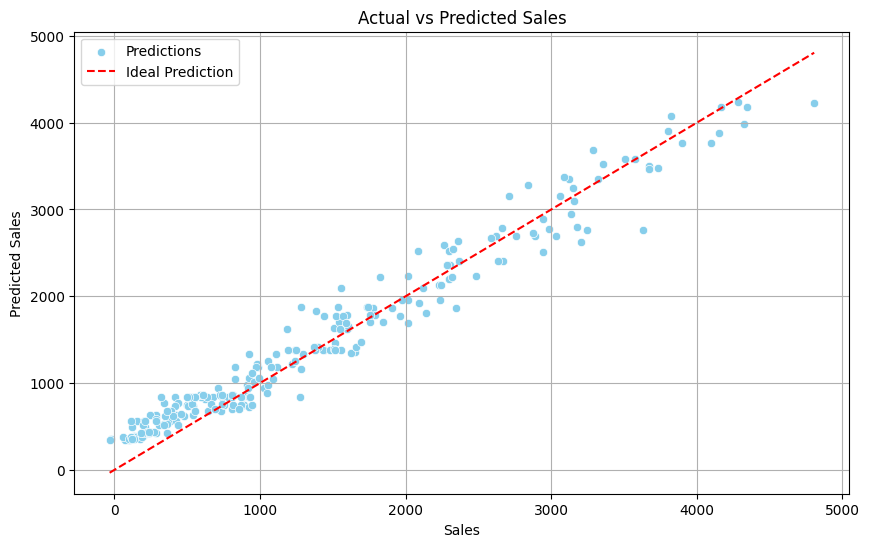

In [22]:
# Make sure y_test is 1D (in case it's a DataFrame)
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='skyblue', label='Predictions')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel("Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()


# ✅ Final Conclusion

In this project, we successfully implemented an **AdaBoost Regression** model to predict target values based on input features. AdaBoost is an ensemble method that combines multiple weak learners (usually decision trees) to create a strong predictive model.

## 🔍 Key Insights:

- 🔢 **Boosting Power**: AdaBoost improved prediction accuracy by combining weak learners iteratively, reducing bias and variance.  
- 📊 **Model Performance**: With metrics like MAE (~203.02), MSE (~60,858.71), RMSE (~246.70), and R² Score (~95.10%), the model showed excellent predictive power and strong fit.  
- 📈 **Visual Evaluation**: Predictions closely followed the actual values, confirming the model’s effectiveness in capturing trends.  

## 💡 Why It Matters:
- AdaBoost is highly effective for structured/tabular datasets, providing both accuracy and robustness.  
- This project demonstrates practical knowledge of ensemble methods and adds a powerful regression technique to your ML portfolio.  
- It sets a solid foundation for exploring other advanced ensemble models like Gradient Boosting, Random Forest, and XGBoost.  

> 🎯 This notebook showcases a strong understanding of ensemble learning, model evaluation, and regression tasks. Excellent work!
